<a href="https://colab.research.google.com/github/ferrry-ghsb/bigdata_6team/blob/main/%5Bksy%5DRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import os
import pandas as pd
import keras
from keras.layers import RNN 
from keras.models import Sequential 
from keras.layers import Dense, SimpleRNN
import keras.backend as K 
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive')
#전처리 완료된 파일 불러오기
train = pd.read_csv('/content/drive/MyDrive/수업/빅데이터분석/데이터/gro_train.csv')
test = pd.read_csv('/content/drive/MyDrive/수업/빅데이터분석/데이터/gro_test.csv')
train= train.iloc[:, 1:4]
test= test.iloc[:, 1:4]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
time_steps = 7
target = 1
train_len = len(train)
test_len = len(test)

In [35]:
X_train = []
Y_train = []
for i in range(time_steps, train_len-1):
  X_train.append(train[i-time_steps:i])
  Y_train.append(train.iloc[i, 0])

X_test = []
Y_test = []
for i in range(time_steps, test_len-1):
  X_test.append(test[i-time_steps:i])
  Y_test.append(test.iloc[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [36]:
X_train.shape, Y_train.shape

((1506, 7, 3), (1506,))

In [37]:
X_test.shape, Y_test.shape

((192, 7, 3), (192,))

In [39]:
X_train.shape

(1506, 7, 3)

In [52]:
K.clear_session()
model = Sequential()
model.add(SimpleRNN(20, input_shape=(None, 3), return_sequences=False)),
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                480       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
48/48 [==============================] - 1s 7ms/step - loss: 0.0276 - val_loss: 0.0117
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0098
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0095
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0083
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0080
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0073
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0070
Epoch 8/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0067
Epoch 9/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0066
Epoch 10/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0064
Epoch 11/

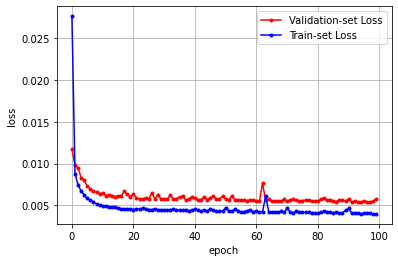

In [54]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [55]:
def plot_predict(a = 0):
    len_stor = range(1, 55)
    len_family = range(33)

    column_name = []
    for store in len_stor:
        for family in len_family:
            column_name+= [f"store : {store} family : {store_family.loc[store].iloc[family].name}"]
                
    plt.plot(scaler.transform(sales_data)[-77:,a])
    plt.plot(model.predict(X_valid)[:, a])
    plt.title(column_name[a])
    plt.legend(['True', 'Predict'])
    plt.show()

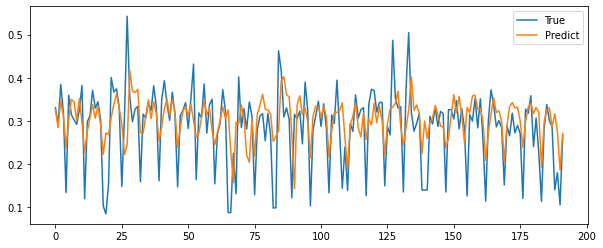

In [56]:
plt.figure(figsize = (10, 4))
plt.plot(test.iloc[time_steps:-target, 0].values)
plt.plot(model.predict(X_test)[:])

plt.legend(['True', 'Predict'])
plt.show()

In [ ]:
#7, 1, 2stack

In [57]:
K.clear_session()
model = Sequential()
model.add(SimpleRNN(20, input_shape=(None, 3), return_sequences=True)),
model.add(SimpleRNN(20, input_shape=(None, 3), return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 20)          480       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
48/48 [==============================] - 2s 12ms/step - loss: 0.0483 - val_loss: 0.0089
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0068
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.0082
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0067
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0069
Epoch 7/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0065
Epoch 8/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0059
Epoch 9/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0065
Epoch 10/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0057
Epoch 11

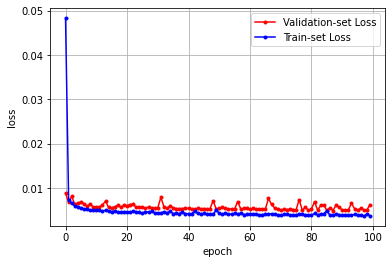

In [59]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

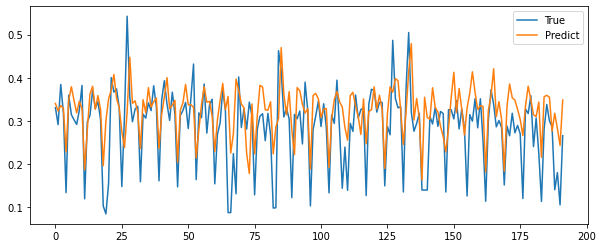

In [60]:
plt.figure(figsize = (10, 4))
plt.plot(test.iloc[time_steps:-target, 0].values)
plt.plot(model.predict(X_test)[:])

plt.legend(['True', 'Predict'])
plt.show()

150, 7일 1스택

In [61]:
time_steps = 150
target = 7
train_len = len(train)
test_len = len(test)

In [62]:
X_train = []
Y_train = []
for i in range(time_steps, train_len-1):
  X_train.append(train[i-time_steps:i])
  Y_train.append(train.iloc[i, 0])

X_test = []
Y_test = []
for i in range(time_steps, test_len-1):
  X_test.append(test[i-time_steps:i])
  Y_test.append(test.iloc[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [63]:
K.clear_session()
model = Sequential()
model.add(SimpleRNN(20, input_shape=(None, 3), return_sequences=False)),
model.add(Dense(7))
model.compile(loss='mean_squared_error', optimizer='adam') 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                480       
                                                                 
 dense (Dense)               (None, 7)                 147       
                                                                 
Total params: 627
Trainable params: 627
Non-trainable params: 0
_________________________________________________________________


In [64]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
43/43 [==============================] - 2s 29ms/step - loss: 0.1333 - val_loss: 0.0295
Epoch 2/100
43/43 [==============================] - 1s 24ms/step - loss: 0.0181 - val_loss: 0.0147
Epoch 3/100
43/43 [==============================] - 1s 25ms/step - loss: 0.0129 - val_loss: 0.0125
Epoch 4/100
43/43 [==============================] - 1s 24ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 5/100
43/43 [==============================] - 1s 25ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 6/100
43/43 [==============================] - 1s 25ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 7/100
43/43 [==============================] - 1s 25ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 8/100
43/43 [==============================] - 1s 24ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 9/100
43/43 [==============================] - 1s 25ms/step - loss: 0.0080 - val_loss: 0.0075
Epoch 10/100
43/43 [==============================] - 1s 25ms/step - loss: 0.0077 - val_loss: 0.0071

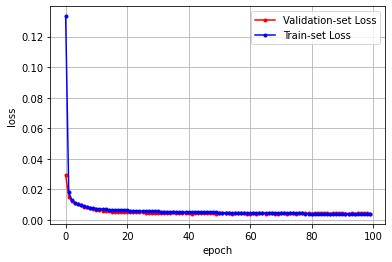

In [65]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

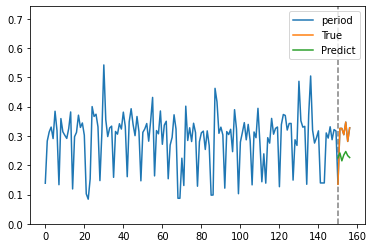

In [66]:
i = 4
plt.plot(np.arange(time_steps + target), test.iloc[i:time_steps + target+i, 0].values)
plt.plot(np.arange(time_steps, time_steps + target), test.iloc[i+time_steps:time_steps + target+i, 0].values)
plt.plot(np.arange(time_steps, time_steps + target) , model.predict(np.expand_dims(X_train[i], axis = 0)).squeeze())
plt.vlines(150, 0, 1, color = 'gray', linestyle = '--')
plt.ylim(0,test.iloc[:time_steps + target, 0].values.max() + 0.2)
plt.legend(['period', 'True', 'Predict'])
plt.show()